


 RESULTS FOR CAM 1: (distorted vs undistorted)



z = 0.00 ▼


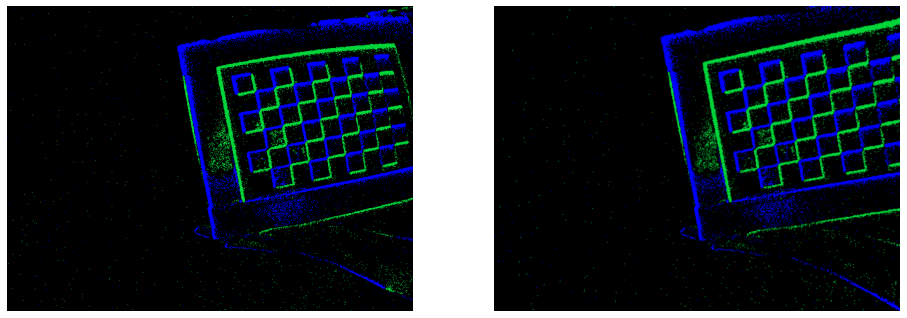




z = 0.10 ▼


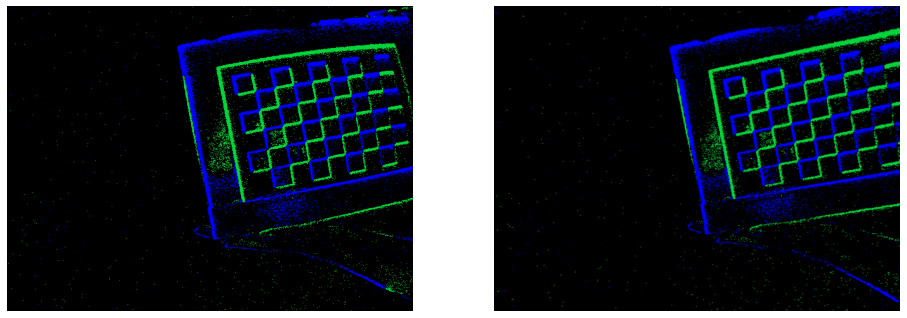




z = 0.20 ▼


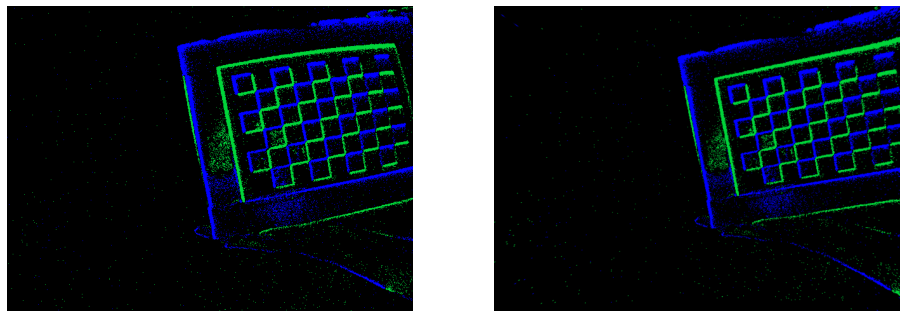




z = 0.30 ▼


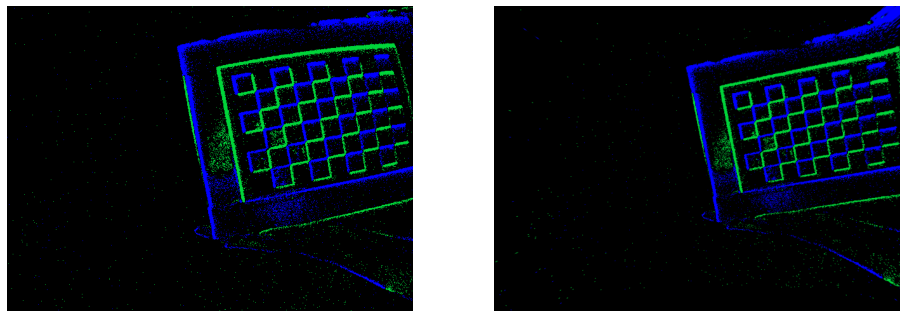




z = 0.40 ▼


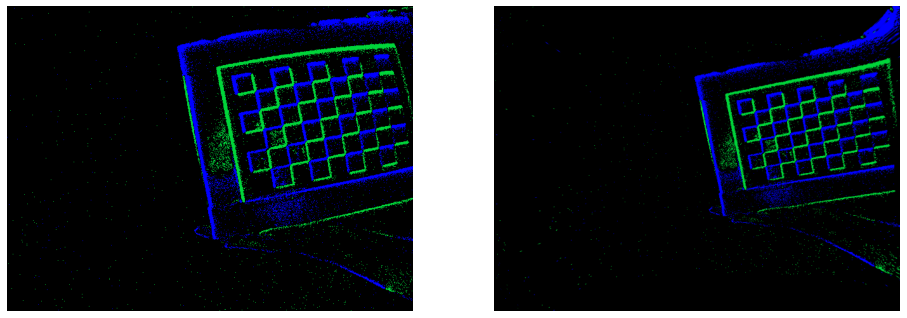




z = 0.50 ▼


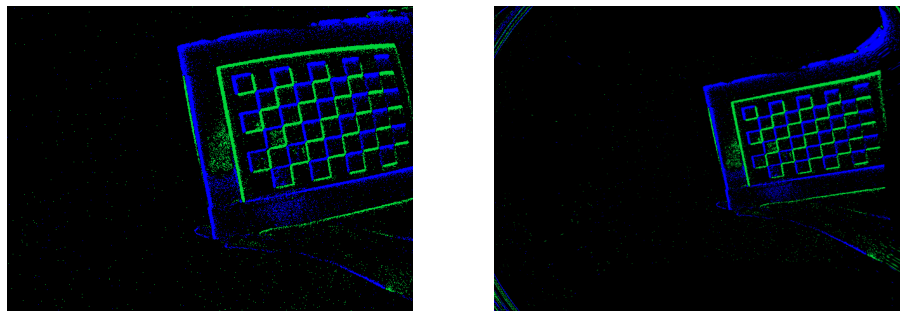




z = 0.60 ▼


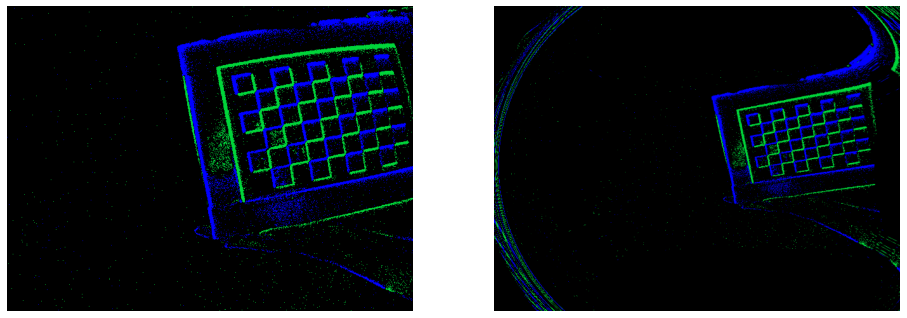




z = 0.70 ▼


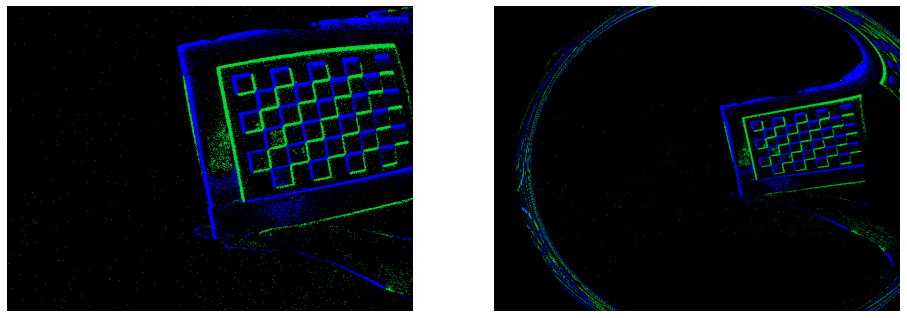




z = 0.80 ▼


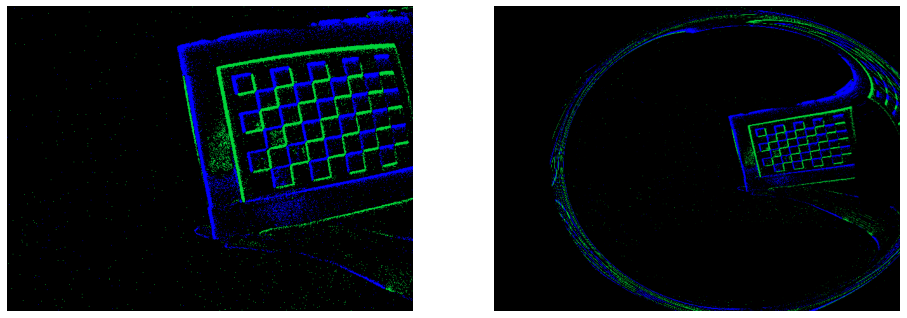




z = 0.90 ▼


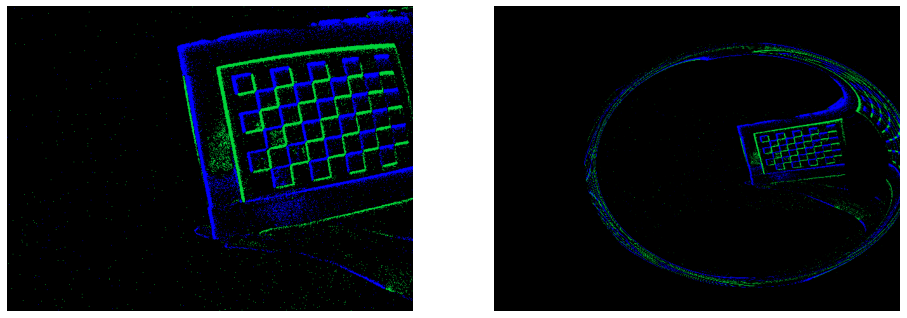




z = 1.00 ▼


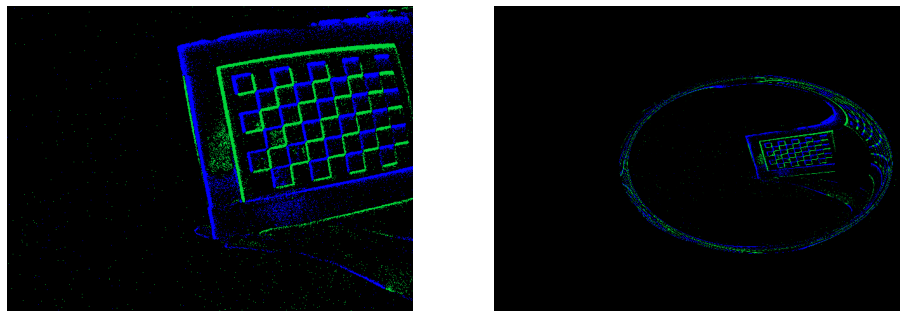




 RESULTS FOR CAM 2: (distorted vs undistorted)



z = 0.00 ▼


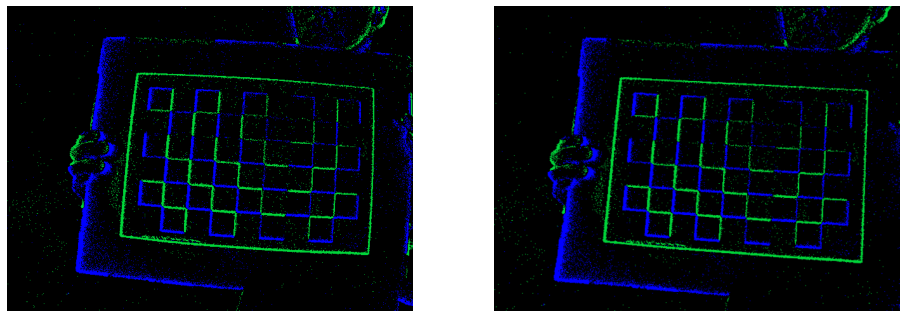

In [ ]:

%matplotlib inline

import xml.etree.ElementTree as ET
import re
import numpy as np
import cv2 as cv
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


'''
This function:
- loads camera params from *.xml (w, h, cam_m and d_coeff)
- reads a distorted image (generated with the corresponding camera)
- creates distortion maps
- maps distorted to undistorted image

'''
def undistort_and_show(camera_id, z):

    # Reading parameters from *.xml
    tree = ET.parse("calibration/cam" + str(camera_id) + ".xml")
    root = tree.getroot()

    w = int(root[0][2].text) # number of columns in camera sensor
    h = int(root[0][3].text) # number of rows in camera sensor

    # Regular expression to get values out of *.xml
    rescinot = re.compile('[-+]?[\d]+\.?[\d]*[Ee](?:[-+]?[\d]+)?|[\d]')

    # Get Camera Matrix 
    cam_m = np.array(re.findall(rescinot, root[0][0][3].text))

    # Get Distortion Coefficients
    d_coeff = np.array(re.findall(rescinot, root[0][1][3].text))

    # Refactoring matrices and coefficients
    cam_m = cam_m.astype(np.float64).reshape((3,3))
    d_coeff = d_coeff.astype(np.float64)

    # Loading image
    img = cv.imread("distorted_" + str(camera_id) + ".png")

    # Undistorting stuff ...
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(cam_m, d_coeff, (h,w), z, (h,w))
    mapx, mapy = cv.initUndistortRectifyMap(cam_m, d_coeff, None, newcameramtx, (w,h), 5)
    dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

    # Plotting Stuff
    fig, axs = plt.subplots(1,2, figsize=(16,8))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].imshow(img)
    axs[1].imshow(dst)
    plt.pause(1)
    
'''
For each camera, 'z' is evaluated from 0 to 1 in 0.1 steps
'''
if __name__ == "__main__":
    
    for i in [1,2,3]:
        
        camera_id = i
        print("\n\n\n RESULTS FOR CAM %d: (distorted vs undistorted)" %(i))   
        
        for j in range(11) :
            
            z = j*0.1
            print("\n\n\nz = %3.2f ▼" %(z))
            undistort_and_show(camera_id, z)